# Lab | Handling Data Imbalance in Classification Models
### Aída Moure 

In [687]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [688]:
churnData = pd.read_csv('Customer-Churn.txt') 

### Brief cleaning and EDA

In [689]:
churnData.shape #we have 7043 rows and 16 columns

(7043, 16)

In [690]:
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [691]:
churnData.info() #there are no missing values. Most variables are strings, so maybe we have blanks?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [692]:
churnData.gender.value_counts()        

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [693]:
churnData.SeniorCitizen.value_counts()     

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [694]:
churnData.Partner.value_counts()     

Partner
No     3641
Yes    3402
Name: count, dtype: int64

In [695]:
churnData.Dependents.value_counts()     

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

In [696]:
churnData.tenure.value_counts()     

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

In [697]:
churnData.PhoneService.value_counts()     

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

In [698]:
churnData.OnlineSecurity.value_counts()          

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

In [699]:
churnData.OnlineBackup.value_counts()      

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

In [700]:
churnData.DeviceProtection.value_counts()  

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

In [701]:
churnData.TechSupport.value_counts()  

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

In [702]:
churnData.StreamingTV.value_counts()  

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

In [703]:
churnData.StreamingMovies.value_counts()  

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

In [704]:
churnData.Contract.value_counts()  

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [705]:
churnData.MonthlyCharges.value_counts()       

MonthlyCharges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: count, Length: 1585, dtype: int64

In [706]:
churnData.TotalCharges.value_counts()       

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [707]:
churnData.TotalCharges.replace({' ':'20.2'}, inplace=True) #there were 11 missing (blank) values. These were replaced by the most common value: 20.2

In [708]:
churnData.TotalCharges=pd.to_numeric(churnData.TotalCharges)

In [709]:
churnData.TotalCharges.info() #now it is passed to numeric, no missing!

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7043 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB


In [710]:
churnData.Churn.value_counts()  #this will be my dependent variable

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Use the following features: `tenure`, `SeniorCitizen`, `MonthlyCharges` and `TotalCharges`

In [711]:
churnData.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [712]:
churnData.Churn.replace({'Yes':1}, inplace=True)
churnData.Churn.replace({'No':0}, inplace=True)

In [713]:
churnData.Churn.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [714]:
y=churnData['Churn']

In [715]:
X=churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]

In [716]:
X

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.50
2,2,0,53.85,108.15
3,45,0,42.30,1840.75
4,2,0,70.70,151.65
...,...,...,...,...
7038,24,0,84.80,1990.50
7039,72,0,103.20,7362.90
7040,11,0,29.60,346.45
7041,4,1,74.40,306.60


In [717]:
X.describe()

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,0.162147,64.761692,2279.765853
std,24.559481,0.368612,30.090047,2266.762876
min,0.000000,0.000000,18.250000,18.800000
25%,9.000000,0.000000,35.500000,398.550000
50%,29.000000,0.000000,70.350000,1394.550000
75%,55.000000,0.000000,89.850000,3786.600000
max,72.000000,1.000000,118.750000,8684.800000


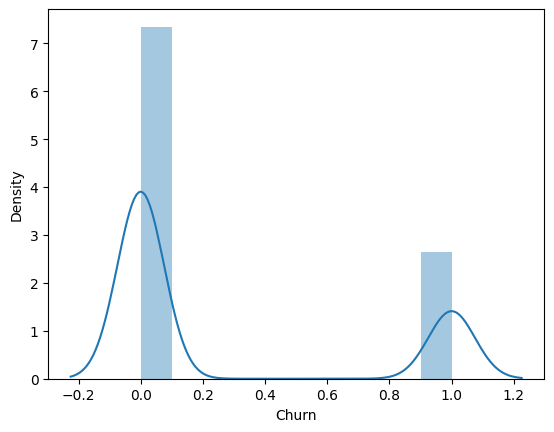

In [718]:
sns.distplot(y)
plt.show()

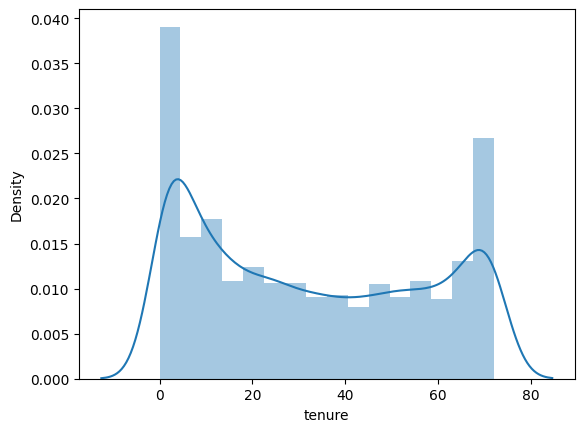

In [719]:
sns.distplot(X['tenure'])
plt.show()

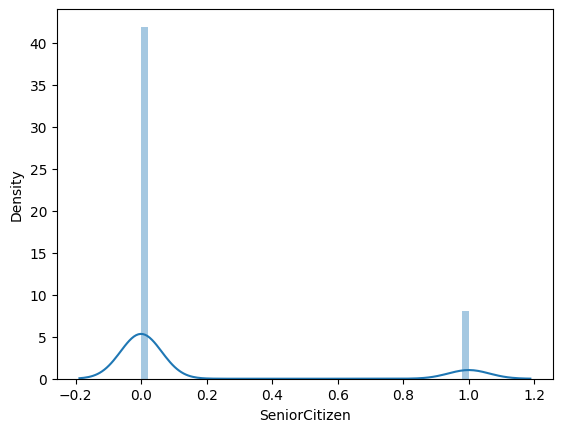

In [720]:
sns.distplot(X['SeniorCitizen'])
plt.show()

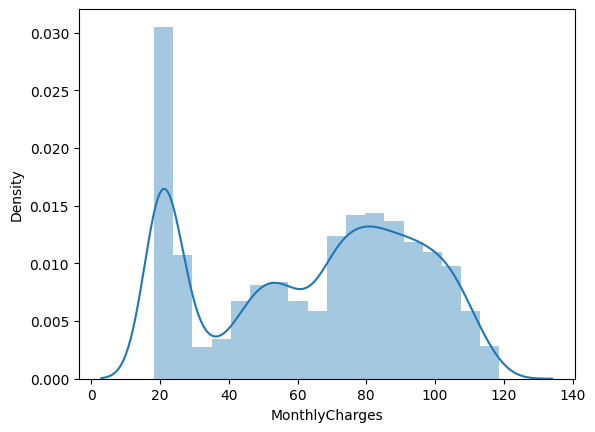

In [721]:
sns.distplot(X['MonthlyCharges'])
plt.show()

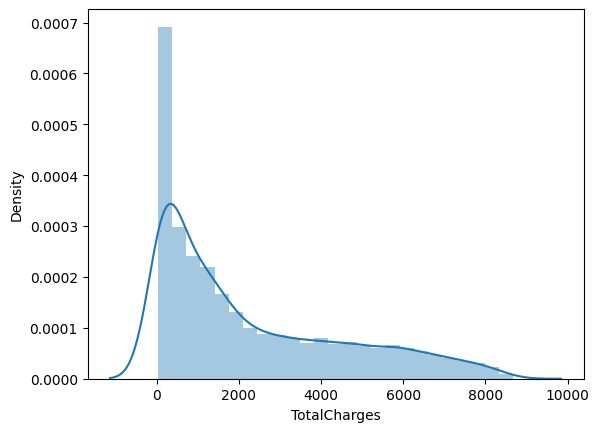

In [722]:
sns.distplot(X['TotalCharges'])
plt.show()

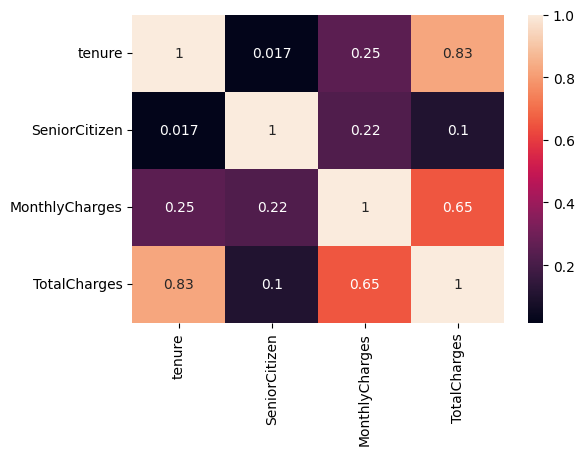

In [723]:
data_corr = X
corr_matrix=data_corr.corr(method='pearson')
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()
#no correlation up to 0.9

In [724]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [725]:
variables=X.copy()
vif_data=pd.DataFrame()
vif_data["Variable"]=variables.columns
vif_data["VIF"]=[variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
print(vif_data)
#all under 10, so ok!

         Variable       VIF
0          tenure  6.332601
1   SeniorCitizen  1.257277
2  MonthlyCharges  3.694898
3    TotalCharges  8.081161


### Let's transform the data and perform the Logit model

In [726]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

from sklearn.linear_model import LogisticRegression

In [727]:
#let's try by scaling:
scaler=MinMaxScaler().fit(X)
x_scaled=scaler.transform(X)
print(x_scaled)
#all variables are now between 0 and 1, makes sense

[[0.01388889 0.         0.11542289 0.0012751 ]
 [0.47222222 0.         0.38507463 0.21586661]
 [0.02777778 0.         0.35422886 0.01031041]
 ...
 [0.15277778 0.         0.11293532 0.03780868]
 [0.05555556 1.         0.55870647 0.03321025]
 [0.91666667 0.         0.86965174 0.78764136]]


In [728]:
X_train, X_test, y_train, y_test= train_test_split(x_scaled,y, test_size=0.2, random_state=42)

In [729]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: Churn
Non-Null Count  Dtype
--------------  -----
7043 non-null   int64
dtypes: int64(1)
memory usage: 55.2 KB


In [730]:
model=LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [731]:
model.score(X_train, y_train)

0.7880724174653887

In [732]:
model.score(X_test, y_test)

0.8034066713981547

In [733]:
#let's try by standarising:
optimusprime=StandardScaler().fit(X)
x_standarised=optimusprime.transform(X)
print(x_standarised)

[[-1.27744458 -0.43991649 -1.16032292 -0.99263828]
 [ 0.06632742 -0.43991649 -0.25962894 -0.17218103]
 [-1.23672422 -0.43991649 -0.36266036 -0.95809317]
 ...
 [-0.87024095 -0.43991649 -1.1686319  -0.85295782]
 [-1.15528349  2.27315869  0.32033821 -0.8705392 ]
 [ 1.36937906 -0.43991649  1.35896134  2.0139108 ]]


In [734]:
X_train, X_test, y_train, y_test= train_test_split(x_standarised,y, test_size=0.2, random_state=42)

In [735]:
model=LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [736]:
model.score(X_train, y_train)

0.7884274050408235

In [737]:
model.score(X_test, y_test)

0.8062455642299503

In [738]:
#let's try by standarising:
transformer=Normalizer().fit(X)
x_normalized=transformer.transform(X)
print(x_normalized)

[[0.02368203 0.         0.70690847 0.70690847]
 [0.0179831  0.         0.0301217  0.99938446]
 [0.01655198 0.         0.44566203 0.89504826]
 ...
 [0.03161954 0.         0.08508531 0.99587183]
 [0.01267729 0.00316932 0.23579761 0.97171433]
 [0.00964118 0.         0.0154332  0.99983442]]


In [739]:
X_train, X_test, y_train, y_test= train_test_split(x_normalized,y, test_size=0.2, random_state=42)

In [740]:
model=LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [741]:
model.score(X_train, y_train)

0.758430954916578

In [742]:
model.score(X_test, y_test)

0.7629524485450674

In [743]:
model.score(X_test, y_test)

0.7629524485450674

In [744]:
#the worst result is given by the normaliser. The other two are very similar. Let's stick to the scaled one.

#Let's see how the balancing behaves in these transformed models

# Check for the imbalance

In [745]:
#df_x_normalized = pd.DataFrame(x_normalized, columns=transformer.get_feature_names_out())

In [746]:
data=pd.concat([y,X], axis=1)

In [747]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Churn           7043 non-null   int64  
 1   tenure          7043 non-null   int64  
 2   SeniorCitizen   7043 non-null   int64  
 3   MonthlyCharges  7043 non-null   float64
 4   TotalCharges    7043 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 275.2 KB


In [748]:
data #ok

,Churn,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,0,1,0,29.85,29.85
1,0,34,0,56.95,1889.50
2,1,2,0,53.85,108.15
3,0,45,0,42.30,1840.75
4,1,2,0,70.70,151.65
...,...,...,...,...,...
7038,0,24,0,84.80,1990.50
7039,0,72,0,103.20,7362.90
7040,0,11,0,29.60,346.45
7041,1,4,1,74.40,306.60


In [749]:
data.Churn.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [750]:
data.shape

(7043, 5)

#### *Downsampling, method 1*


In [751]:
category_0 = data[data['Churn'] == 0]
category_1 = data[data['Churn'] == 1]

In [752]:
category_0 = category_0.sample(len(category_1), replace=True)
print(category_1.shape)
print(category_0.shape)

(1869, 5)
(1869, 5)


In [753]:
data = pd.concat([category_0, category_1], axis=0)
#shuffling the data
data = data.sample(frac=1)
data['Churn'].value_counts()

Churn
0    1869
1    1869
Name: count, dtype: int64

In [754]:
Y_balanc=data['Churn']
X_balanc=data.drop(columns=['Churn'])

In [755]:
Y_balanc

5793    0
6082    1
6708    1
3983    1
5287    0
       ..
6882    0
3954    0
5485    0
1065    1
6952    1
Name: Churn, Length: 3738, dtype: int64

In [756]:
X_balanc

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
5793,14,0,55.50,767.55
6082,59,0,101.10,6039.90
6708,14,1,74.30,1096.25
3983,1,0,24.25,24.25
5287,1,0,20.55,20.55
...,...,...,...,...
6882,71,1,99.65,7181.25
3954,17,1,94.80,1563.90
5485,1,0,50.75,50.75
1065,23,0,90.05,2169.80


In [757]:
#let's transform by scaling:
scaler=MinMaxScaler().fit(X_balanc)
x_scaled=scaler.transform(X_balanc)
print(x_scaled)
#all variables are now between 0 and 1, makes sense

[[0.19444444 0.         0.37118559 0.08639561]
 [0.81944444 0.         0.82741371 0.69479399]
 [0.19444444 1.         0.55927964 0.12432567]
 ...
 [0.01388889 0.         0.32366183 0.00368107]
 [0.31944444 0.         0.71685843 0.24820706]
 [0.66666667 0.         0.89044522 0.58879292]]


In [758]:
X_train, X_test, y_train, y_test= train_test_split(x_scaled,Y_balanc, test_size=0.2, random_state=42)

In [759]:
model = sm.Logit(y_train,X_train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.533876
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 2990
Model:                          Logit   Df Residuals:                     2986
Method:                           MLE   Df Model:                            3
Date:                Sat, 25 May 2024   Pseudo R-squ.:                  0.2298
Time:                        17:58:06   Log-Likelihood:                -1596.3
converged:                       True   LL-Null:                       -2072.5
Covariance Type:            nonrobust   LLR p-value:                3.768e-206
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -4.3723      0.344    -12.727      0.000      -5.046      -3.699
x2             0.7492      0.117      6.420      0.000       0.520       0.978
x3             2.5728      0.139     18.461      0.000       2.300       2.846
x4             0.7801      0.478      1.633      0.103      -0.156       1.716
==============================================================================
"""

In [760]:
model=LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [761]:
model.score(X_train, y_train)

0.7294314381270903

In [762]:
model.score(X_test, y_test)

0.7459893048128342

#### *Upsampling, method 1*

In [763]:
data=pd.concat([y,X], axis=1)

In [764]:
data.shape

(7043, 5)

In [765]:
data.Churn.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [766]:
category_0 = data[data['Churn'] == 0]
category_1 = data[data['Churn'] == 1]

In [767]:
category_1 = category_1.sample(len(category_0), replace=True)
print(category_1.shape)
print(category_0.shape)
#now they are balanced up to the highest category

(5174, 5)
(5174, 5)


In [768]:
data = pd.concat([category_1, category_0], axis=0)
#shuffling the data
data = data.sample(frac=1)
data['Churn'].value_counts()

Churn
1    5174
0    5174
Name: count, dtype: int64

In [769]:
Y_balanc=data['Churn']
X_balanc=data.drop(columns=['Churn'])

In [770]:
#let's transform by scaling:
scaler=MinMaxScaler().fit(X_balanc)
x_scaled=scaler.transform(X_balanc)
print(x_scaled)
#all variables are now between 0 and 1, makes sense

[[8.33333333e-02 0.00000000e+00 7.49253731e-01 5.97276714e-02]
 [1.38888889e-02 0.00000000e+00 1.64179104e-02 1.26932841e-04]
 [6.11111111e-01 0.00000000e+00 1.64179104e-02 9.80036926e-02]
 ...
 [1.00000000e+00 0.00000000e+00 7.33830846e-01 7.63206785e-01]
 [6.94444444e-02 0.00000000e+00 6.01990050e-01 4.53842603e-02]
 [1.00000000e+00 0.00000000e+00 2.73631841e-02 1.70199631e-01]]


In [771]:
X_train, X_test, y_train, y_test= train_test_split(x_scaled,Y_balanc, test_size=0.2, random_state=42)

In [772]:
model = sm.Logit(y_train,X_train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.524442
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 8278
Model:                          Logit   Df Residuals:                     8274
Method:                           MLE   Df Model:                            3
Date:                Sat, 25 May 2024   Pseudo R-squ.:                  0.2434
Time:                        17:58:06   Log-Likelihood:                -4341.3
converged:                       True   LL-Null:                       -5737.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -4.9042      0.219    -22.344      0.000      -5.334      -4.474
x2             0.7159      0.069     10.315      0.000       0.580       0.852
x3             2.7470      0.086     31.791      0.000       2.578       2.916
x4             1.3607      0.302      4.507      0.000       0.769       1.953
==============================================================================
"""

In [773]:
model=LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [774]:
model.score(X_train, y_train)

0.732302488523798

In [775]:
model.score(X_test, y_test)

0.7222222222222222

#### *Downsampling, using KNN*

In [776]:
y.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [777]:
#let's transform by scaling:
scaler=MinMaxScaler().fit(X)
x_scaled=scaler.transform(X)
print(x_scaled)
#all variables are now between 0 and 1, makes sense

[[0.01388889 0.         0.11542289 0.0012751 ]
 [0.47222222 0.         0.38507463 0.21586661]
 [0.02777778 0.         0.35422886 0.01031041]
 ...
 [0.15277778 0.         0.11293532 0.03780868]
 [0.05555556 1.         0.55870647 0.03321025]
 [0.91666667 0.         0.86965174 0.78764136]]


In [778]:
from imblearn.under_sampling import TomekLinks

In [779]:
tl = TomekLinks()

In [780]:
X_tl, y_tl = tl.fit_resample(X,y)


In [781]:
y_tl.value_counts()
#now they are more balanced than before applying the TomekLinks. However, they are not exactly the 
#same as this method does not achieve this.

Churn
0    4622
1    1869
Name: count, dtype: int64

In [782]:
X_train, X_test, y_train, y_test= train_test_split(X_tl,y_tl, test_size=0.2, random_state=42)

In [783]:
model = sm.Logit(y_train,X_train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.449888
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 5192
Model:                          Logit   Df Residuals:                     5188
Method:                           MLE   Df Model:                            3
Date:                Sat, 25 May 2024   Pseudo R-squ.:                  0.2516
Time:                        17:58:06   Log-Likelihood:                -2335.8
converged:                       True   LL-Null:                       -3121.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
tenure            -0.1224      0.005    -22.588      0.000      -0.133      -0.112
SeniorCitizen      0.7900      0.095      8.296      0.000       0.603       0.977
MonthlyCharges     0.0118      0.001     13.595      0.000       0.010       0.013
TotalCharges       0.0007   5.43e-05     13.334      0.000       0.001       0.001
==================================================================================
"""

In [784]:
model=LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [785]:
model.score(X_train, y_train)

0.7966101694915254

In [786]:
model.score(X_test, y_test)

0.7782909930715936

Upsampling using KNN

In [787]:
#let's transform by scaling:
scaler=MinMaxScaler().fit(X)
x_scaled=scaler.transform(X)
print(x_scaled)
#all variables are now between 0 and 1, makes sense

[[0.01388889 0.         0.11542289 0.0012751 ]
 [0.47222222 0.         0.38507463 0.21586661]
 [0.02777778 0.         0.35422886 0.01031041]
 ...
 [0.15277778 0.         0.11293532 0.03780868]
 [0.05555556 1.         0.55870647 0.03321025]
 [0.91666667 0.         0.86965174 0.78764136]]


In [788]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()


In [789]:
X_sm, y_sm = smote.fit_resample(x_scaled, y)
y_sm.value_counts()

Churn
0    5174
1    5174
Name: count, dtype: int64

In [790]:
X_train, X_test, y_train, y_test= train_test_split(X_sm,y_sm, test_size=0.2, random_state=42)

In [791]:
model = sm.Logit(y_train,X_train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.530783
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 8278
Model:                          Logit   Df Residuals:                     8274
Method:                           MLE   Df Model:                            3
Date:                Sat, 25 May 2024   Pseudo R-squ.:                  0.2342
Time:                        17:58:06   Log-Likelihood:                -4393.8
converged:                       True   LL-Null:                       -5737.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -4.9046      0.218    -22.462      0.000      -5.333      -4.477
x2             0.6153      0.069      8.919      0.000       0.480       0.751
x3             2.6901      0.085     31.482      0.000       2.523       2.858
x4             1.5232      0.299      5.092      0.000       0.937       2.109
==============================================================================
"""

In [792]:
model=LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [793]:
model.score(X_train, y_train)

0.7330273012805025

In [579]:
model.score(X_test, y_test)

0.7483091787439613

### Conclusions:

- All methods give similar scores. Upsampling is better given that we have not so much data and when downsampling we end up with a poorer database in terms of N (less robust/representative?)

- Between the upsampling method 1 and method2 (SMOTE) the upsampling provides a slightly better result.